# **4.05 ファッションの画像（MNIST）の学習**

# 【データの準備と確認】

リスト4-35：（リストA）

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 48.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=af05b45fe0e9d27decf7b4b7f22486d4fc0d96f4f4c8311c8b95ef8f5ff62fa6
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


リスト4-36

In [ ]:
from keras.datasets import fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"学習データ（問題画像）　：{x_train.shape}")
print(f"テストデータ（問題画像）：{x_test.shape}")

4422102/4422102 [==============================] - 1s 0us/step
学習データ（問題画像）　：(60000, 28, 28)
テストデータ（問題画像）：(10000, 28, 28)


リスト4-37

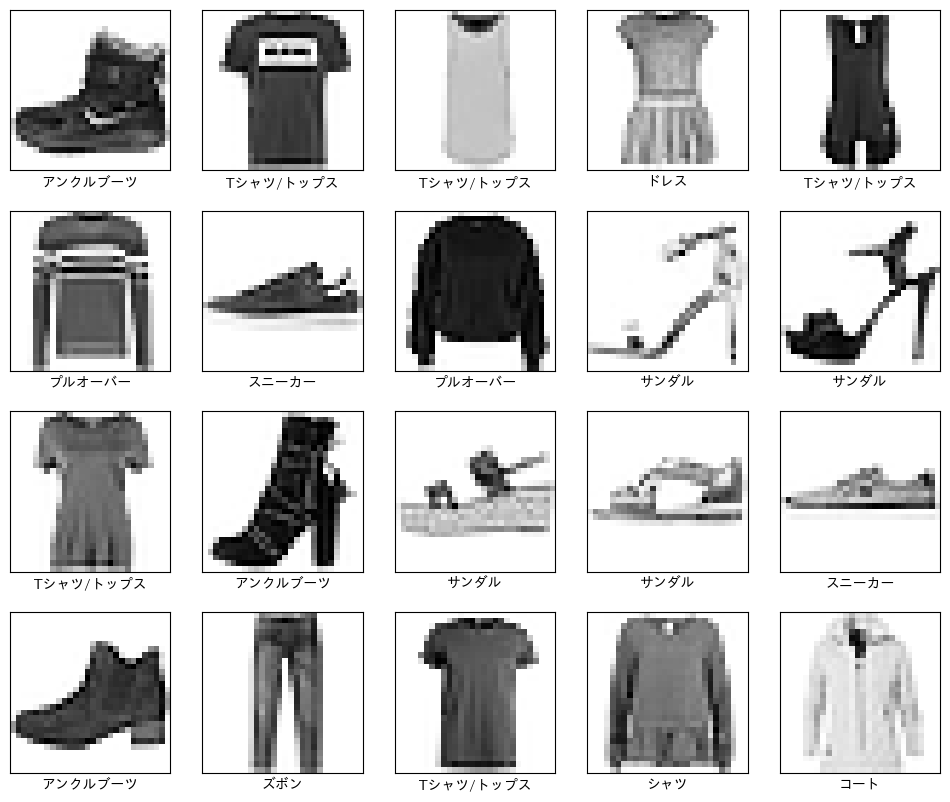

In [ ]:
class_names = ["Tシャツ/トップス", "ズボン", "プルオーバー", "ドレス", "コート",
               "サンダル", "シャツ", "スニーカー", "バッグ", "アンクルブーツ"]
def disp_data(xdata, ydata):
    plt.figure(figsize=(12,10))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i], cmap="Greys")
        plt.xlabel(class_names[ydata[i]])
    plt.show()

disp_data(x_train, y_train)

リスト4-38

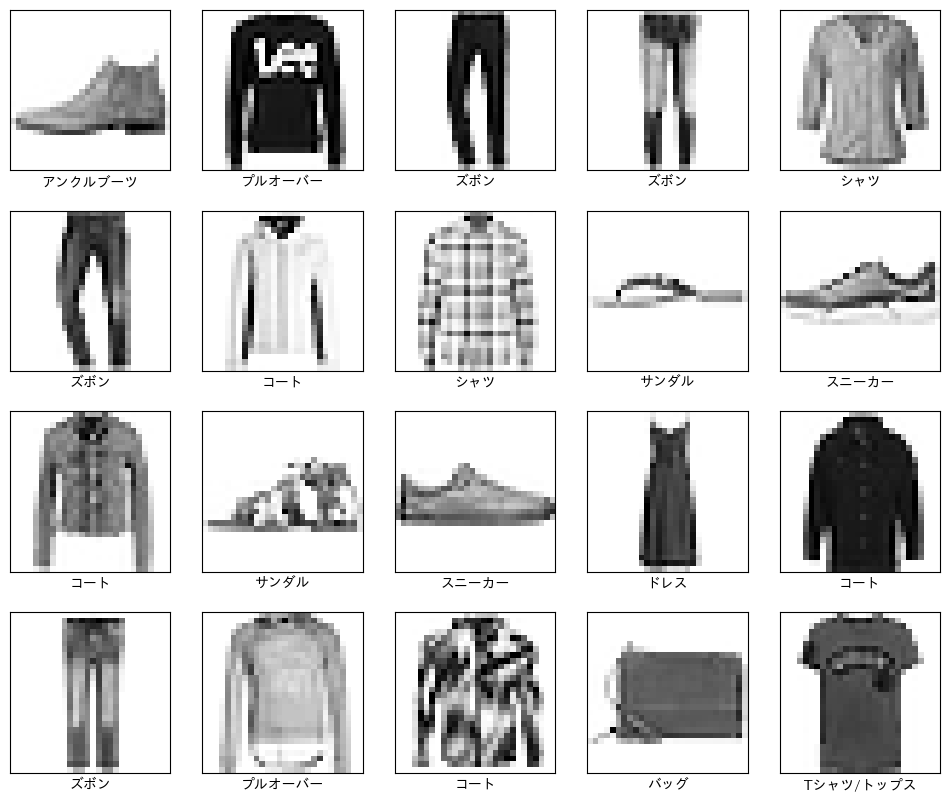

In [ ]:
disp_data(x_test, y_test)

# 【モデルを作って学習】

リスト4-39

In [ ]:
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


リスト4-40：（リストB’）

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, #10
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/10
1875/1875 [==============================] - 18s 6ms/step - loss: 0.4950 - accuracy: 0.8259 - val_loss: 0.4377 - val_accuracy: 0.8433
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3737 - accuracy: 0.8657 - val_loss: 0.4074 - val_accuracy: 0.8530
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3345 - accuracy: 0.8792 - val_loss: 0.3752 - val_accuracy: 0.8641
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3114 - accuracy: 0.8878 - val_loss: 0.3576 - val_accuracy: 0.8698
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2950 - accuracy: 0.8924 - val_loss: 0.3551 - val_accuracy: 0.8711
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2794 - accuracy: 0.8973 - val_loss: 0.3421 - val_accuracy: 0.8781
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2668 - accuracy: 0.9004 - val_loss: 0.3342 - val_accuracy

リスト4-41：（リストC）

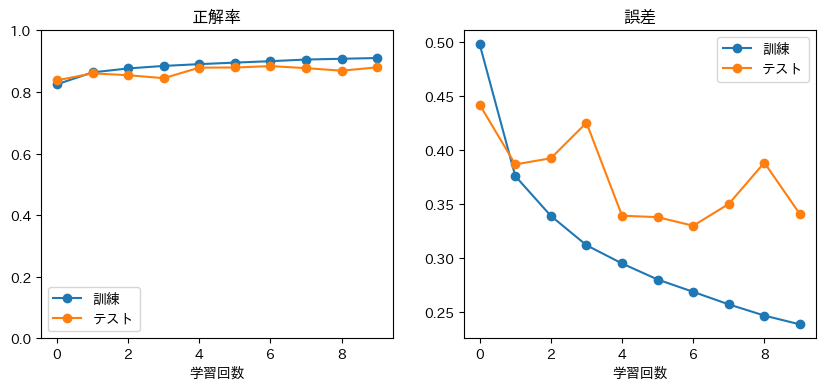

In [ ]:
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

# 【データを渡して予測】

リスト4-42

313/313 [==============================] - 1s 2ms/step


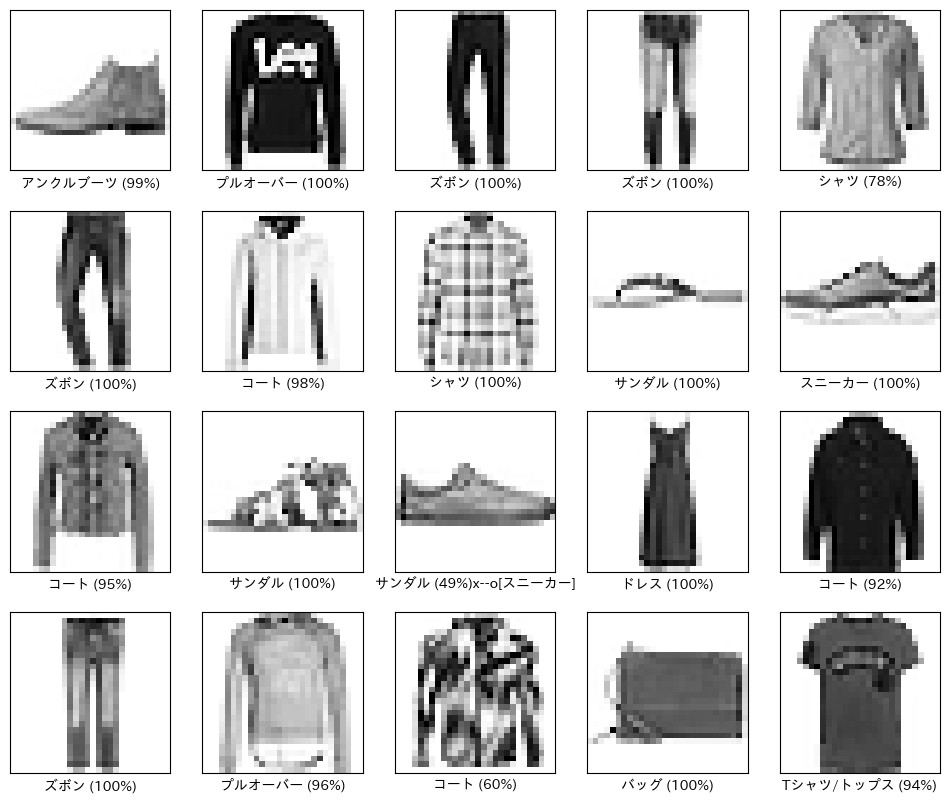

In [ ]:
pre = model.predict(x_test)

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap="Greys")

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans = ""
    if index != y_test[i]:
        ans = "x--o["+class_names[y_test[i]]+"]" #
    lbl = f"{class_names[index]} ({pct:.0%}){ans}" #
    plt.xlabel(lbl)
plt.show()